# Anomaly Detection in Univariate Time Series with Random Forest, in the context of WISDom project: Time Series Data Analysis

### Flow Rate Data from a sensor in a Water Sypply System located in Barreiro

## Start

### Import necessary libraries

In [1]:
# Basics
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
%matplotlib inline

# Decompose Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

### Load dataset

In [2]:
# Names of the columns
features = ["date", "time", "value", "detection"]

train = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/Barreiro/train_barreiro_1.csv', sep = ';', names = features, parse_dates=['date'], index_col='date')

# OR timeserie.set_index('date',inplace=True)

### Train dataset

#### Panel data

Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.

In [3]:
# Visualize data
train

,time,value,detection
date,,,
2018-03-05,00:07:30,13.026578,0
2018-03-05,00:22:30,10.898906,0
2018-03-05,00:37:30,11.048772,0
2018-03-05,00:52:30,10.641706,0
2018-03-05,01:07:30,10.452578,0
...,...,...,...
2018-09-05,22:52:30,22.357783,0
2018-09-05,23:07:30,19.707922,0
2018-09-05,23:22:30,19.546844,0


#### Univariate Time Series

In [4]:
# Building a univariate time series with the variables date (index) and value
timeserie = train[['value']]

In [5]:
# Visualize data
timeserie

,value
date,
2018-03-05,13.026578
2018-03-05,10.898906
2018-03-05,11.048772
2018-03-05,10.641706
2018-03-05,10.452578
...,...
2018-09-05,22.357783
2018-09-05,19.707922
2018-09-05,19.546844


In [6]:
# The index (row labels) of the DataFrame
timeserie.index

DatetimeIndex(['2018-03-05', '2018-03-05', '2018-03-05', '2018-03-05',
               '2018-03-05', '2018-03-05', '2018-03-05', '2018-03-05',
               '2018-03-05', '2018-03-05',
               ...
               '2018-09-05', '2018-09-05', '2018-09-05', '2018-09-05',
               '2018-09-05', '2018-09-05', '2018-09-05', '2018-09-05',
               '2018-09-05', '2018-09-05'],
              dtype='datetime64[ns]', name='date', length=480, freq=None)

### Visualizing a time series

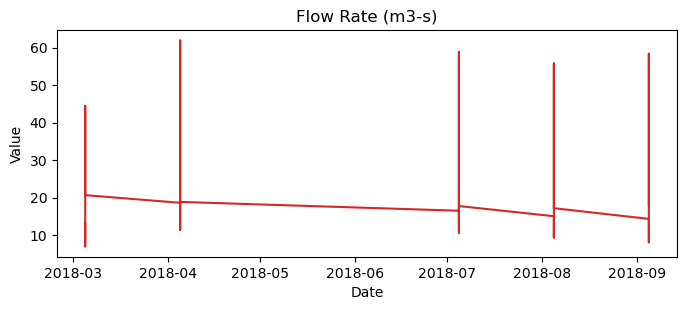

In [12]:
# Draw Plot
def plot_df(timeserie, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    # Width, height in inches and dots-per-inches (dpi) determines how many pixels the figure comprises.
    plt.figure(figsize=(8,3), dpi=dpi)
    # Specifying the color of the graphic
    plt.plot(x, y, color='tab:red')
    # Get the current Axes instance on the current figure matching the given keyword args, or create one.
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    # Display all open figures.
    plt.show()

plot_df(timeserie, x=timeserie.index, y=timeserie.value, title='Flow Rate (m3-s)')    

In [ ]:
# It looks like months of the year and not days of the month of May

### Decompose a time series into its components

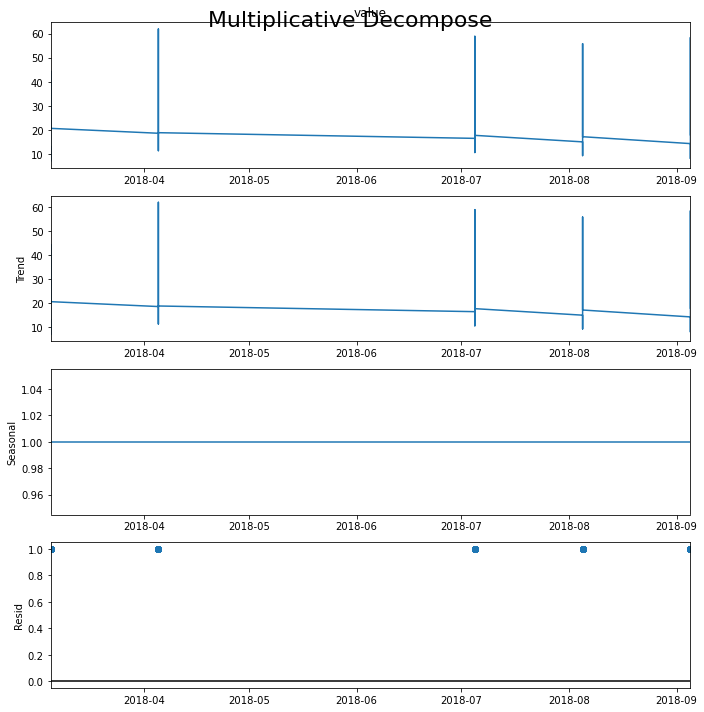

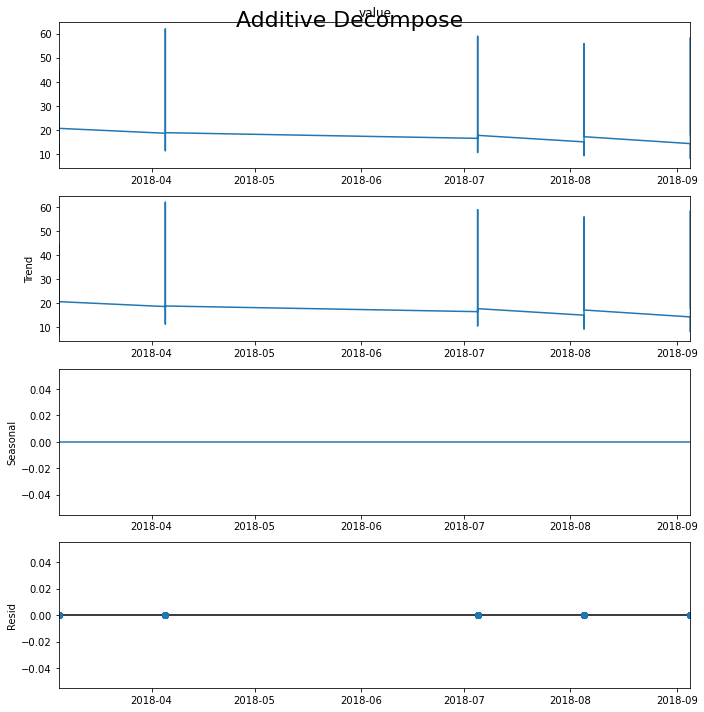

In [13]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(timeserie['value'], model='multiplicative', extrapolate_trend='freq', period = 1)

# Additive Decomposition
result_add = seasonal_decompose(timeserie['value'], model='additive', extrapolate_trend='freq', period = 1)

# Model - type of seasonal component
# Extrapolate_trend - use freq closest points
# Period - period of the series

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [14]:
result = seasonal_decompose(timeserie, model='additive', period=1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

date
2018-03-05    13.026578
2018-03-05    10.898906
2018-03-05    11.048772
2018-03-05    10.641706
2018-03-05    10.452578
                ...    
2018-09-05    22.357783
2018-09-05    19.707922
2018-09-05    19.546844
2018-09-05    21.068406
2018-09-05    17.953072
Name: trend, Length: 480, dtype: float64
date
2018-03-05    0.0
2018-03-05    0.0
2018-03-05    0.0
2018-03-05    0.0
2018-03-05    0.0
             ... 
2018-09-05    0.0
2018-09-05    0.0
2018-09-05    0.0
2018-09-05    0.0
2018-09-05    0.0
Name: seasonal, Length: 480, dtype: float64
date
2018-03-05    0.0
2018-03-05    0.0
2018-03-05    0.0
2018-03-05    0.0
2018-03-05    0.0
             ... 
2018-09-05    0.0
2018-09-05    0.0
2018-09-05    0.0
2018-09-05    0.0
2018-09-05    0.0
Name: resid, Length: 480, dtype: float64
date
2018-03-05    13.026578
2018-03-05    10.898906
2018-03-05    11.048772
2018-03-05    10.641706
2018-03-05    10.452578
                ...    
2018-09-05    22.357783
2018-09-05    19.707922
20

### Test dataset

In [15]:
test = pd.read_csv('C:/Users/Catarina/Documents/WISDom_Internship/WISDom_InternshipCode/WISDom_Internship/Synthetic_Data/RandomForest/Barreiro/test_barreiro_1.csv', sep = ';', names = features, parse_dates=['date'], index_col='date')

In [16]:
test

,time,value,detection
date,,,
2018-10-05,00:07:30,15.713694,0
2018-10-05,00:22:30,14.460300,0
2018-10-05,00:37:30,14.975789,0
2018-10-05,00:52:30,14.658967,0
2018-10-05,01:07:30,11.786478,0
...,...,...,...
2018-10-05,22:52:30,23.881589,0
2018-10-05,23:07:30,21.902367,0
2018-10-05,23:22:30,23.582700,0


In [17]:
test.index

DatetimeIndex(['2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
               '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-05',
      

#### Univariate Time Series

In [18]:
timeserie1 = test[['value']]

In [19]:
timeserie1

,value
date,
2018-10-05,15.713694
2018-10-05,14.460300
2018-10-05,14.975789
2018-10-05,14.658967
2018-10-05,11.786478
...,...
2018-10-05,23.881589
2018-10-05,21.902367
2018-10-05,23.582700


### Visualizing a time series

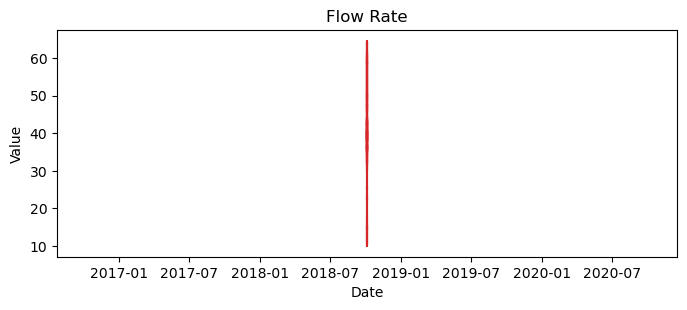

In [20]:
# Draw Plot
def plot_df(timeserie1, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(8,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(timeserie1, x=timeserie1.index, y=timeserie1.value, title='Flow Rate')    

### Decompose a time series into its components

C:\Users\Catarina\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:302: UserWarning: Attempting to set identical left == right == 736972.0 results in singular transformations; automatically expanding.
  ax.set_xlim(xlim)


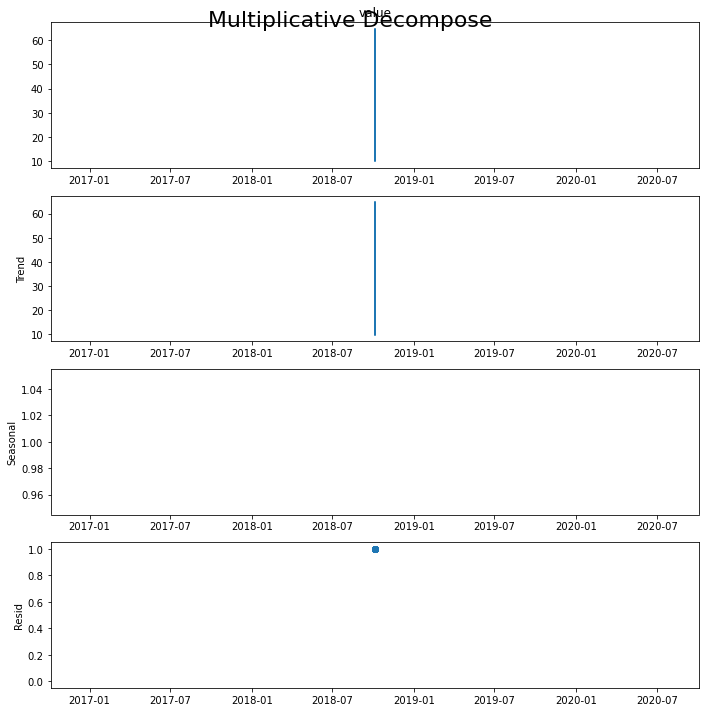

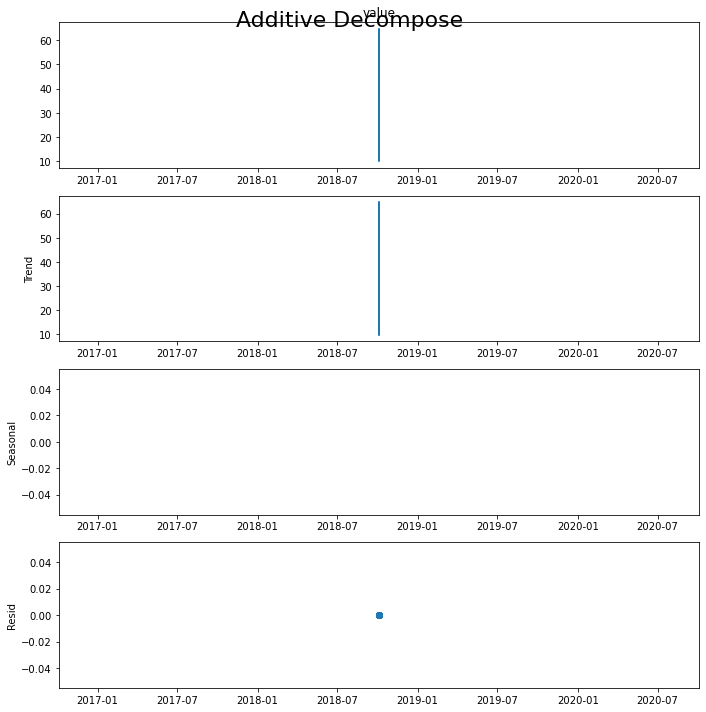

In [21]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(timeserie1['value'], model='multiplicative', extrapolate_trend='freq', period = 1)

# Additive Decomposition
result_add = seasonal_decompose(timeserie1['value'], model='additive', extrapolate_trend='freq', period = 1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

### Workshop graphics

In [ ]:
# Missing code

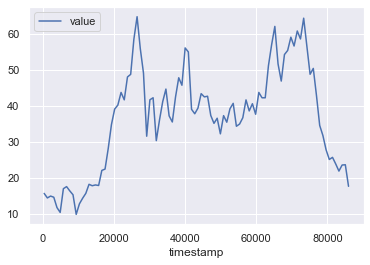

In [49]:
timeserie1.plot()

[Text(0, 0.5, 'Value'), Text(0.5, 0, 'Time'), Text(0.5, 1.0, 'Flow Rate')]

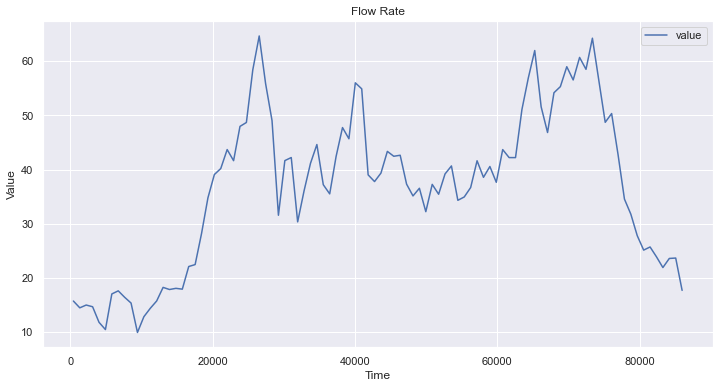

In [51]:
ax = timeserie1.plot(figsize=(12,6))
ax.set(title='Flow Rate', xlabel='Time', ylabel='Value')

### Convert time in seconds to time in hours

In [29]:
time = timeserie1['timestamp'] // 3600

test['timestamp1'] = pd.to_datetime(test['time'])

test['timestamp1'] = test['timestamp1'].dt.hour

In [30]:
test

,date,time,value,detection,int_date,timestamp,dayofweek,month,timestamp1
0,2018-10-05,00:07:30,15.713694,0,20181005,450,4,10,0
1,2018-10-05,00:22:30,14.460300,0,20181005,1350,4,10,0
2,2018-10-05,00:37:30,14.975789,0,20181005,2250,4,10,0
3,2018-10-05,00:52:30,14.658967,0,20181005,3150,4,10,0
4,2018-10-05,01:07:30,11.786478,0,20181005,4050,4,10,1
5,2018-10-05,01:22:30,10.446106,0,20181005,4950,4,10,1
6,2018-10-05,01:37:30,17.025783,0,20181005,5850,4,10,1
7,2018-10-05,01:52:30,17.597394,0,20181005,6750,4,10,1
8,2018-10-05,02:07:30,16.407461,0,20181005,7650,4,10,2
9,2018-10-05,02:22:30,15.341344,0,20181005,8550,4,10,2
